## Guidance of how to generate an average face

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import glob

from face_landmarks import detect_landmarks
from face_average import AverageFace

In [8]:
face_aver = AverageFace(224,224)

In [2]:
# Read points from text files in directory
def readPoints(path) :
    detect_landmarks(path)

    # Create an array of array of points.
    pointsArray = []

    #List all files in the directory and read points from text files one by one
    for filePath in sorted(os.listdir(path)):
        
        if filePath.endswith(".txt"):
            
            #Create an array of points.
            points = []            
            
            # Read points from filePath
            with open(os.path.join(path, filePath)) as file :
                for line in file :
                    x, y = line.split()
                    points.append((int(x), int(y)))
            
            # Store array of points
            pointsArray.append(points)
            
    return pointsArray

In [3]:
# Read all jpg images in folder.
def readImages(path) :

    #Create array of array of images.
    imagesArray = []

    im_paths = glob.glob(os.path.join(path, '*.jpg'))
    im_paths += glob.glob(os.path.join(path, '*.jpeg'))
    im_paths += glob.glob(os.path.join(path, '*.png'))

    print(im_paths)

    #List all files in the directory and read points from text files one by one
    for filePath in sorted(im_paths):
        # Read image found.
        img = cv2.imread(filePath)

        # Convert to floating point
        img = np.float32(img)/255.0

        # Add to array of images
        imagesArray.append(img)

    return imagesArray

Automatically find all images in given directory

In [7]:
facial_landmarks = readPoints('test_image')
images = readImages('test_image')

Done
Processing file: test_image/george-h-bush.jpg
Number of faces detected: 1, choosing biggest
Processing file: test_image/ronald-regan.jpg
Number of faces detected: 1, choosing biggest
Processing file: test_image/george-w-bush.jpg
Number of faces detected: 1, choosing biggest
Processing file: test_image/jimmy-carter.jpg
Number of faces detected: 1, choosing biggest
Processing file: test_image/bill-clinton.jpg
Number of faces detected: 2, choosing biggest
Processing file: test_image/barak-obama.jpg
Number of faces detected: 1, choosing biggest
['test_image/george-h-bush.jpg', 'test_image/ronald-regan.jpg', 'test_image/george-w-bush.jpg', 'test_image/jimmy-carter.jpg', 'test_image/bill-clinton.jpg', 'test_image/barak-obama.jpg']


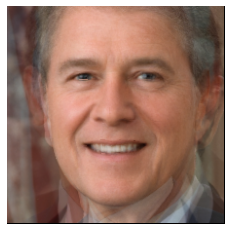

In [11]:
plt.axis('off')
plt.imshow(cv2.cvtColor(face_aver.face_average(images,facial_landmarks), cv2.COLOR_RGB2BGR))

In [16]:
# Save result
cv2.imwrite('results/{}.png'.format("example_average_face"), face_aver.face_average(images,facial_landmarks) * 255)

True